# Distributions, Hypothesis Testing, and Distribution Comparisons I

In [173]:
# Import libraries
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Make the plot inside the sheet instead of a separate window
%matplotlib inline



## The (Importance of the) Poisson Distribution

The probability of $\nu$ counts in any definite interval:

$$
P(\nu|\mu) = \frac{\mu^\nu e^{-\mu}}{\nu!}
$$

where $\mu$ is the mean of the distribution.

Some example Poisson distributions...

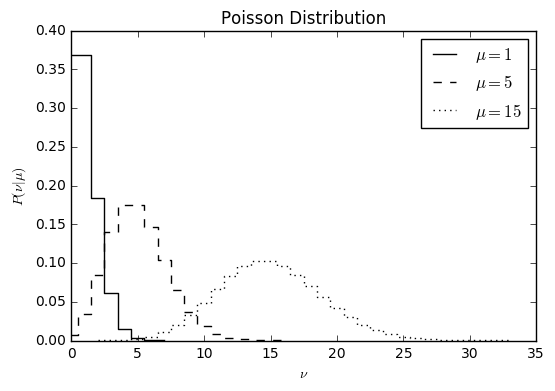

In [174]:
mu_values = [1, 5, 15]
linestyles = ['-', '--', ':']
poisson = stats.poisson

for mu, ls in zip(mu_values, linestyles):
    dist=poisson(mu)
    #stats.poisson?
    x = np.arange(poisson.ppf(0.00001, mu),poisson.ppf(0.99999, mu))
    #plt.plot?
    plt.plot(x, dist.pmf(x), ls=ls, color='black', drawstyle='steps-mid', label=r'$\mu=%i$'%mu)
plt.xlabel(r'$\nu$')
plt.ylabel(r'$P(\nu|\mu)$')
plt.title('Poisson Distribution')
plt.legend()
plt.show()

### Example 1.:  The error on the counts

This is necessary in high energy (e.g., X-ray) astronomy, where we are counting a small number of photons.  In this case, a Gaussian distribution does not look like a Poisson distribution!  For instance, $\mu=3$...

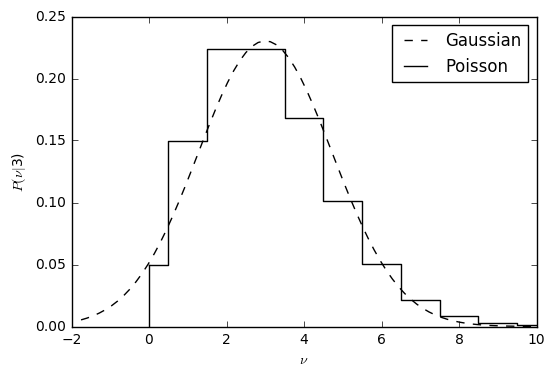

In [175]:
mu=3
dist_poisson=poisson(mu)
gaussian = stats.norm
dist_gaussian=gaussian(mu,mu**0.5)
#stats.norm?
xmin=min(poisson.ppf(0,mu),gaussian.ppf(0.000001,mu))
xmax=max(poisson.ppf(0.999999,mu),gaussian.ppf(0.999999,mu))
x_poisson = np.arange(0,xmax)
x_gaussian = np.arange(xmin,xmax,(xmax-xmin)/100)
plt.plot(x_gaussian, dist_gaussian.pdf(x_gaussian), ls='--', color='black', label='Gaussian')
plt.plot(x_poisson, dist_poisson.pmf(x_poisson), ls='-', color='black', drawstyle='steps-mid',  label='Poisson')
y_poisson=dist_poisson.pmf(x_poisson)
plt.plot([0,0],[0,y_poisson[0]],color='black')
#plt.xlabel(r'$\nu$')
plt.xlim(-2,10)
plt.xlabel(r'$\nu$')
plt.ylabel(r'$P(\nu|$'+str(mu)+')')
plt.legend()
plt.show()

You typically assume that the errors are symmetric, but inspection of the Poisson distribution clearly shows it is not!  For $\mu=3$, $\sigma=-1.44,+2.15$, not $\sigma=\sqrt{\mu}=\pm1.73$!

However, there are essentially always some background counts in a real observation, which can also make Gaussian assumptions even worse!  The proper way to calculate the error bars on the counts for this source is through the product of the source and background Poisson distributions

$$
P(N) = \sum_{N_S, N_B} = \frac {e^{-S}S^{N_S}} {N_S!} \frac {e^{-B}B^{N_B}} {N_B!} = \frac {e^{-(S+B)}(S+B)^N} {N!}
$$

where S is the mean number of source counts, B is the mean number of background counts, and $N = N_S + N_B$.  After making some Bayesian arguments, we numerically integrate this function with a normalization constant for the appropriate confidence interval.

$$
f_{N,B}(S) = C \frac {e^{-(S+B)}(S+B)^N} {N!}
$$

where the normalization is not 1 if $B \neq 0$

$$
C = \left[ \int_0^\infty \frac {e^{-(S+B)}(S+B)^N} {N!} dS \right]^{-1} = \left( \sum_{n=0}^N \frac {e^{-B} B^n} {n!} \right)^{-1}
$$

Practically in order to calculate the confidence intervals, this means stepping away from the mean or function maximum in both directions in even vertical increments until the area under the curve encloses the correct confidence percentage (e.g., $1\sigma=68.27\%$).  For more details and the original solution to this problem, see Kraft, Burrows, & Nousek 1991 (ApJ, 374, 344).

For instance, one of the point sources I have detected (at $\sim3\sigma$) in the nearby edge-on starburst galaxy, M82, has 18 source counts and 8.91 background counts.  If I follow the prescription above, I find $\sigma = -3.92, +4.59$.  This compares to $\sigma = \sqrt{N} = 4.24$ in the large numbers/Gaussian assumption.

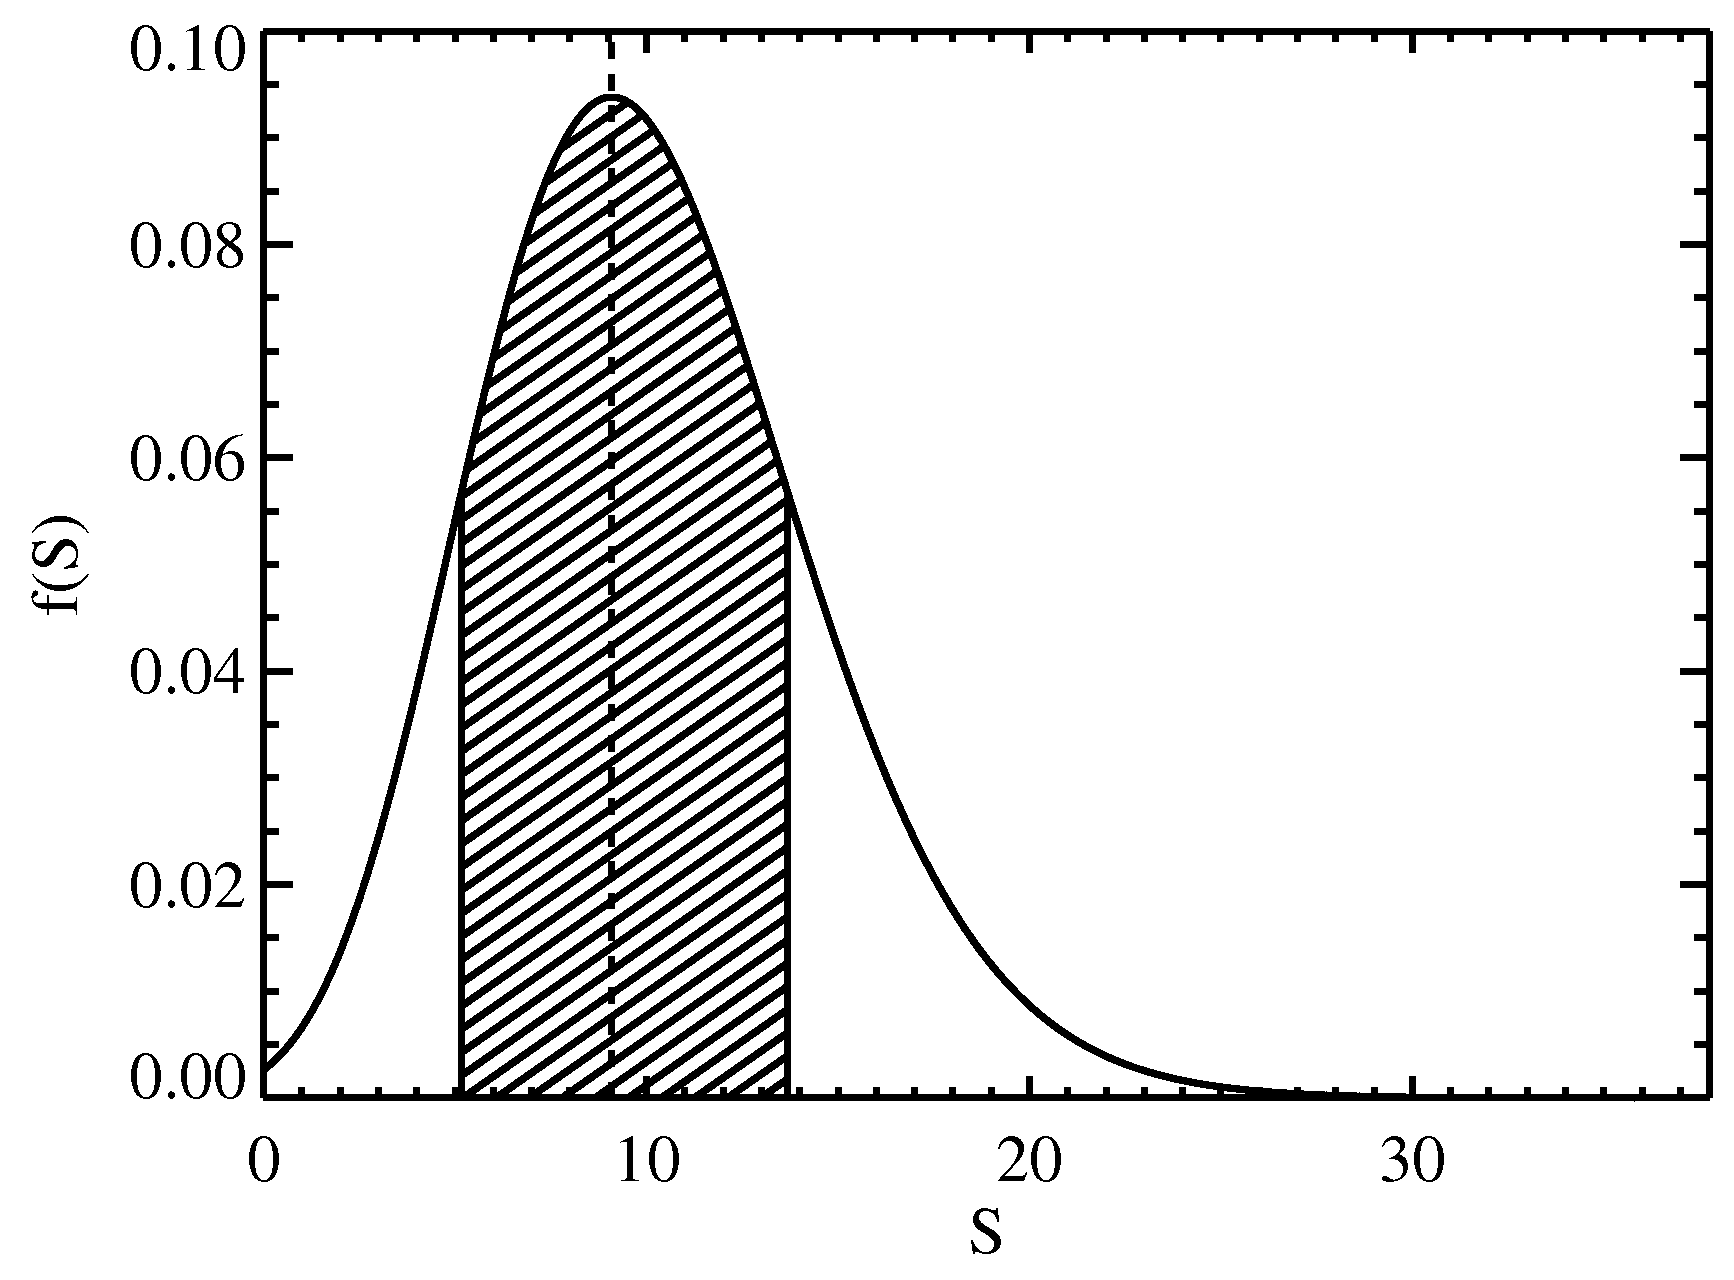

In [176]:
from IPython.display import Image
Image('example_kbn.png',width=600)

### Example 2.:  Challenges in spectral fitting for Gaussian and non-Gaussian (e.g., Poisson) distributed data

Typically, when we are fitting data to a model (e.g., spectral fitting), we usually seek to minimize

$$
\chi^2 = \sum_{i=1}^N \left( \frac {O_i - E_i} {\sigma_i} \right)^2
$$

where O is the observed distribution, E is the expected or model distribution, and $\sigma$ is the uncertainty at each point.  Using some minimization routine, we find the minimum $\chi^2$.  We know that if the $\tilde\chi^2 = \chi^2 / d \approx 1$, where $d$ is the number of degrees of freedom, then we have a good fit.

However, a question that is not asked often enough:  is the fit good enough?  That is, how close does chisquare need to be to 1 to be a "good" fit?

To determine this, we sample the $\chi^2$ distribution

$$
P(x|d) = \frac {x^{d/2 - 1}e^{-x/2}} {2^{d/2}\Gamma^{d/2}}
$$

where $\Gamma = (d-1)!$ is the Gamma function.  Some example $\chi^2$ distributions...

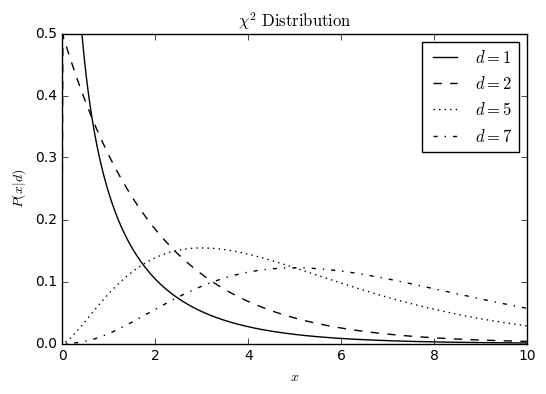

In [177]:
#------------------------------------------------------------
# Define the distribution parameters to be plotted
d_values = [1, 2, 5, 7]
linestyles = ['-', '--', ':', '-.']
mu = 0
x = np.linspace(-1, 20, 1000)

#------------------------------------------------------------
# plot the distributions
for d, ls in zip(d_values, linestyles):
    dist = chi2(d, mu)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$d=%i$' % d)

plt.xlim(0, 10)
plt.ylim(0, 0.5)

plt.xlabel('$x$')
plt.ylabel(r'$P(x|d)$')
plt.title(r'$\chi^2\ \mathrm{Distribution}$')

plt.legend()
plt.show()

By integrating the $\chi^2$ distribution, we can calculate the probability that the $\chi^2$ or $\tilde\chi^2$ is consistent with random fluctuations (a.k.a, the null hypothesis probability).  As with most statistical tests, a common rejection threshold is 5%.  This basically means that, if p>5%, the model is a good enough fit to the data and, if p<5%, the model does not produce a good enough fit to the data.

You can find lookup tables for this information or calculate yourself.  This amounts to calculating a percentile of the distribution

$$
\frac {p} {100} = \int_{-\infty}^{q_p} P(x) dx
$$

For example, the code below calculates $\chi^2$ at the 5% threshold for d=7:

In [178]:
print(chi2.isf(0.05, 7))
print(chi2.isf(0.05, 7)/7)

14.0671404493
2.00959149276


$\chi^2 = 14.07$ or $\tilde\chi^2 = 2.01$.  That is, for d=7, the threshold for an acceptable fit is a $\tilde\chi^2 \sim 2$!  This is why it is very important to always include $\chi^2$ or $\tilde\chi^2$ and $d$ in published work!

...

Finally, let's return to the example of fitting data in X-ray astronomy for a point source with 18 source counts.  You might start by binning the data to the spectral resolution of your instrument.  For typical energy ranges for Chandra, this is on the order of 100 spectral bins.  In any case regardless of your binning choice, no bin will have more than 18 counts.  In fact, with $\sim$100 spectral bins, most bins would have 0, 1, or 2 counts.

Then you would need to subtract the background, which has $\sim 9$ counts.  This implies that in the background-subtracted spectrum, you would have some example bins: $2-1=1, 1-1=0, 0-1=-1$.

This immediately brings about serious statistical issues:

1.  While a Gaussian distribution minus a Gaussian distribution is another Gaussian distribution, a Poisson distribution minus a Poisson distribution is not Poisson distribution!  Poisson distributions are only defined for integer numbers of counts.  (See Thompson, W. J. 1999,  Computing in Science & Engineering, Volume 1, Issue 5, *Don’t Subtract the Background*)

2.  Assumptions for calculating $\chi^2$ break down:
    
    a.)  The error is 0 counts is 0; the error is -1 counts is undefined; $\chi^2$ is undefined!
    
    b.)  The errors are assumed to be symmetric and Gaussian-distributed.  However, as we saw earlier, a Poisson distribution is only a good approximation to a Gaussian when there are a large number of counts!


Our common fitting approach falls to pieces!  What do we do?!

There are two ways forward:

1.  Bin up the data before subtracting the background so that the Gaussian approximation to a Poisson distribution is good enough.
2.  Use a different fitting statistic and method.

**Option 1:**
What is "good enough"?  If we compare the error calculated with method above (Kraft, Burrows, & Nousek 1991) to $\sqrt{N}$, these are the percent errors between the two methods in making this assumption (how wrong we are):

N  | % Error
-  | -
1  | 35%
2  | 24%
5  | 15%
10 | 11%
15 | 9%
20 | 7%
30 | 6%
50 | 5%
99 | 3%

The rule of thumb in X-ray astronomy is to bin to $\sim20-30$ counts/bin.  As you can see:  above this there are diminishing returns and the error made at this level is similar to the systematic calibration errors.  Therefore, this choice is a reasonble balance.  For my example point source, we have a problem because there are only $18$ counts in the source spectrum $\sim9$ of which are from the background.  Fitting any model to only one bin is useless!  In this case, we must consider option 2...

**Option 2:**
Instead of $\chi^2$, there are other statistics one can use, such as likelihood statistics that are formed from the Poisson distribution.  An example is the Cash statistic (Cash, W. 1979, ApJ, 228, 939), which uses the Poisson likelihood function.  This implies:
1.  It is defined for 0-count bins.
2.  The background must not be subtracted but modeled simultaneously.
3.  There is no universally well-defined goodness of fit measure.  You can calculate a reduced Cash statistic, which should be $\sim1$ for a good fit, but there is no universal way to calculate null hypothesis probabilities because they depend on each fitting situation.  These probabilities would have to be simulated each time.